In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path='d1.csv'
data = pd.read_csv(path)

data

,Predictor Variable,Predictor Variable.1,Response Variable
0,3.8915,4.2105,0
1,3.6898,6.6051,0
2,2.7763,7.5057,0
3,3.1137,5.7724,0
4,2.9251,5.4315,0
...,...,...,...
95,5.7629,4.6161,1
96,4.1817,4.0577,1
97,6.3065,2.4776,1
98,5.6043,3.3146,1


In [2]:
X = data[['Predictor Variable', 'Predictor Variable.1']].values
y = data['Response Variable'].values

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000
theta, costs = gradient_descent(X, y, theta, learning_rate, iterations)
final_cost = compute_cost(X, y, theta)
print("Final Cost:", final_cost)
print("Final Parameters after convergence:", theta)

Final Cost: 0.22841635108662275
Final Parameters after convergence: [ 0.02854618  1.94027619 -1.90331374]


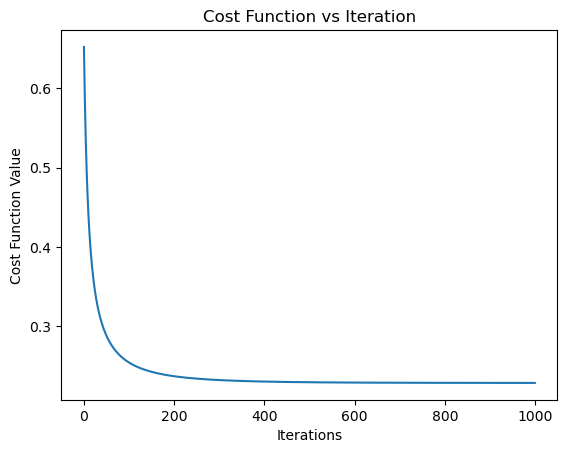

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

X = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros(X.shape[1])
learning_rate = 0.1
iterations = 1000
theta, costs = gradient_descent(X, y, theta, learning_rate, iterations)
plt.plot(range(iterations), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration')
plt.show()

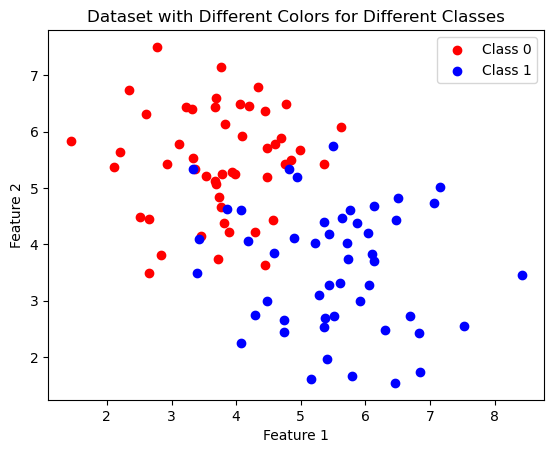

In [4]:
feature1 = data['Predictor Variable']
feature2 = data['Predictor Variable.1']
target = data['Response Variable']

# Plot the dataset with different colors for different classes
plt.scatter(feature1[target == 0], feature2[target == 0], color='red', label='Class 0')
plt.scatter(feature1[target == 1], feature2[target == 1], color='blue', label='Class 1')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Dataset with Different Colors for Different Classes')
plt.show()

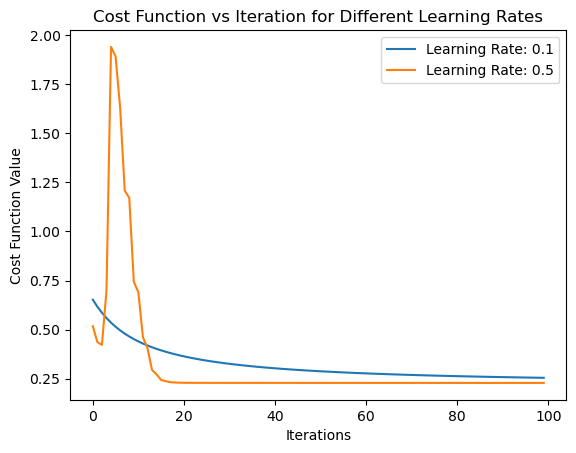

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (1/m) * (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# Add intercept term to X
X = np.c_[np.ones((X.shape[0], 1)), X]

# Initialize theta
theta = np.zeros(X.shape[1])

# Set hyperparameters
iterations = 100
learning_rates = [0.1,0.5]
costs_dict = {}
for learning_rate in learning_rates:
    theta = np.zeros(X.shape[1])
    _, costs = gradient_descent(X, y, theta, learning_rate, iterations)
    costs_dict[learning_rate] = costs

# Plot cost function vs iteration curve for both learning rates
for learning_rate, costs in costs_dict.items():
    plt.plot(range(iterations), costs, label=f'Learning Rate: {learning_rate}')

plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs Iteration for Different Learning Rates')
plt.legend()
plt.show()

In [6]:
import csv

true_labels = []
predicted_labels = []

with open('d1.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        true_labels.append(float(row[0]))
        predicted_labels.append(float(row[1])) 
true_labels_binary = [1 if label >= 0.5 else 0 for label in true_labels]
predicted_labels_binary = [1 if label >= 0.5 else 0 for label in predicted_labels]

true_positive = sum(1 for true, pred in zip(true_labels_binary, predicted_labels_binary) if true == 1 and pred == 1)
true_negative = sum(1 for true, pred in zip(true_labels_binary, predicted_labels_binary) if true == 0 and pred == 0)
false_positive = sum(1 for true, pred in zip(true_labels_binary, predicted_labels_binary) if true == 0 and pred == 1)
false_negative = sum(1 for true, pred in zip(true_labels_binary, predicted_labels_binary) if true == 1 and pred == 0)

accuracy = (true_positive + true_negative) / len(true_labels_binary)
precision = true_positive / (true_positive + false_positive + 1e-10)
recall = true_positive / (true_positive + false_negative + 1e-10)
f1_score = 2 * (precision * recall) / (precision + recall + 1e-10)
print("Confusion Matrix:")
print([[true_negative, false_positive], [false_negative, true_positive]])
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[0, 0], [0, 100]]
Accuracy: 1.0
Precision: 0.999999999999
Recall: 0.999999999999
F1 Score: 0.9999999999490001
